<a href="https://colab.research.google.com/github/Akashkc7/CODSOFT/blob/main/Car_Sales_Price_Prediction_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                    **CAR SALES PRICE PREDICTION**







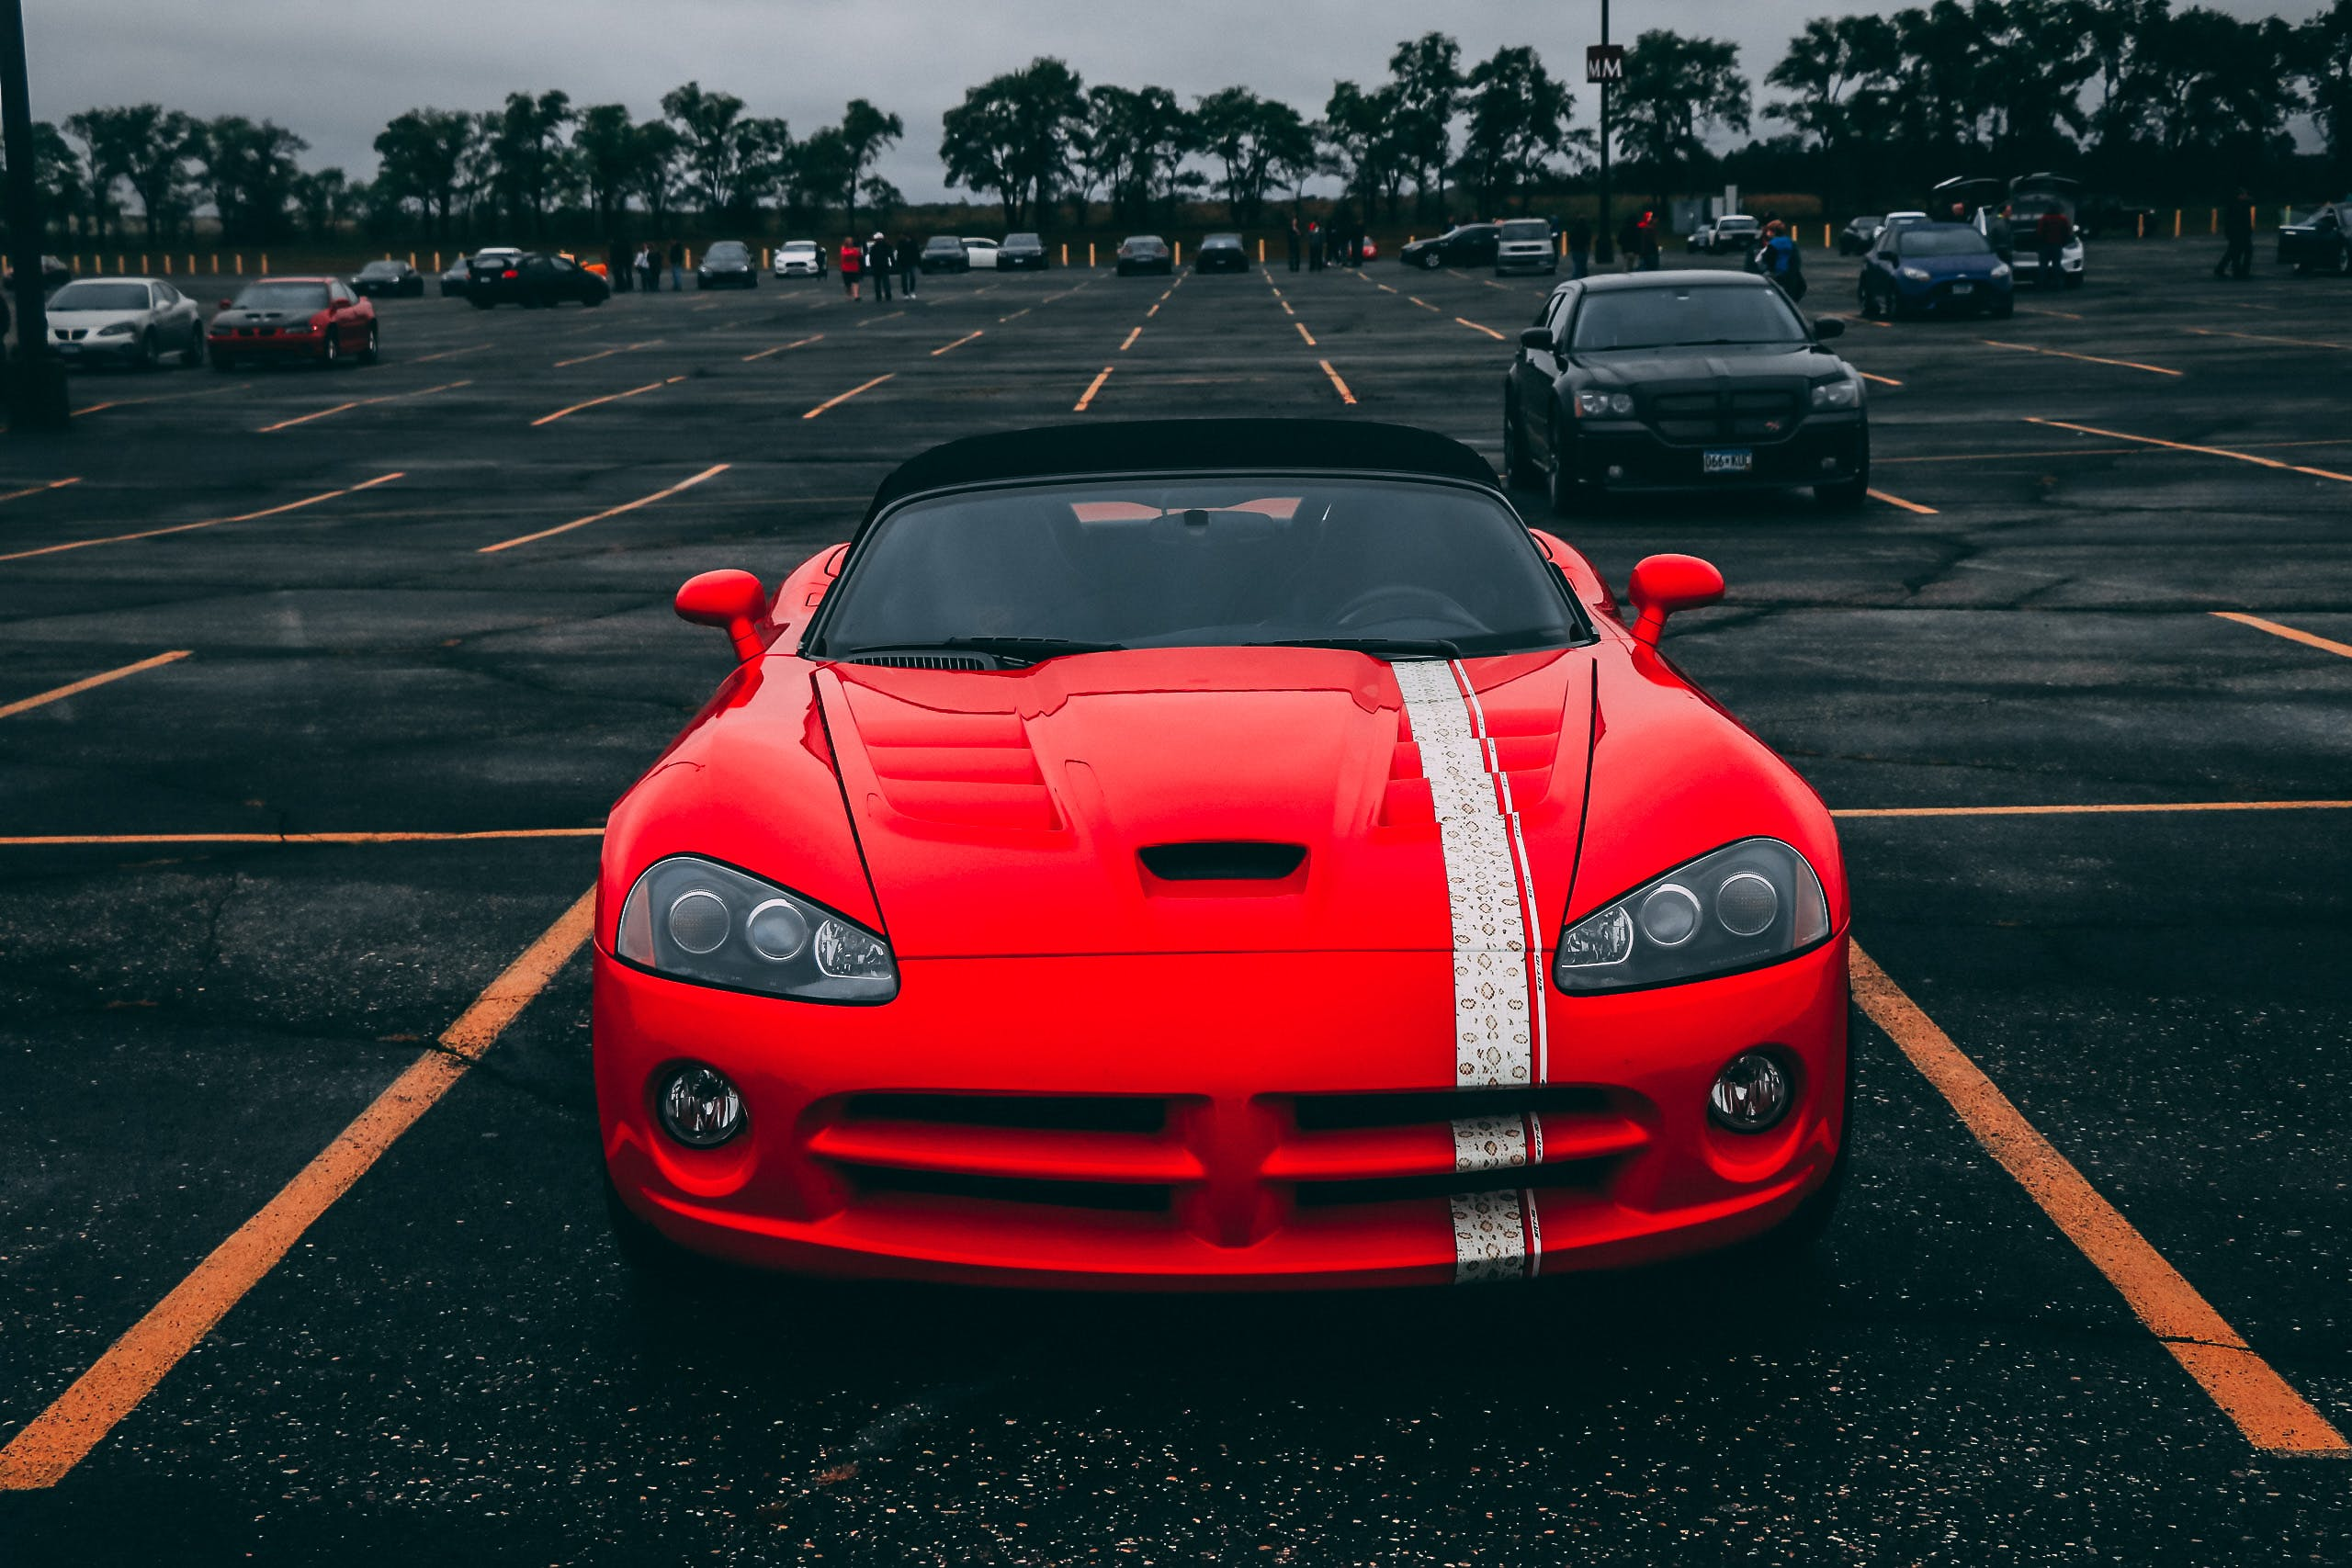

**CONTENTS**

Importing Libraries

Importing dataset

Exploratory Data Analysis

Data Preprocessing

Data Visualisation

Train,Test Split

Feature Scaling

Model Creation

Conclusion

**Importing Libraries**

In [250]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [251]:
df = pd.read_csv('/content/car_purchasing.csv',encoding='ISO-8859-1')


In [252]:
df

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


**Exploratory Data Analysis(EDA)**

In [253]:
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [254]:
df.tail()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353
499,Marla,Camaron.marla@hotmail.com,marlal,1,46.731152,61370.67766,9391.341628,462946.4924,45107.22566


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [256]:
df.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [257]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000




**The above table gives a detailed explanation of our data:**


*   It shows that there are a total of 500 customers.
*   The oldest customer we had was aged 70 years old while the youngest
was aged 20 years old while the average age stood at 46 years old.

*   The highest earning customer was making 100,000 yearly while the least
 earning customer was making 20,000 yearly while the average earning
  amongst all customers was 62,127 annually.

*   The richest customer had a net worth of 1,000,000 and the least rich had a net worth of 20,000 and the average net worth was 431,476.
*   The highest amount paid for a car was 80,000 with the least paid at
9,000 while the average paid among all customers stands at 44,210








   
    
    
    
    

**Data Preprocessing**

In [258]:
df.isna().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [259]:
df.duplicated().sum()

0

In [260]:
df=df.drop(columns=['customer name','customer e-mail'],axis=1)

In [261]:
df.head()

,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [262]:
num_cols=['age','annual Salary','credit card debt','net worth']

**Data Visualisation**

<Axes: xlabel='gender', ylabel='count'>

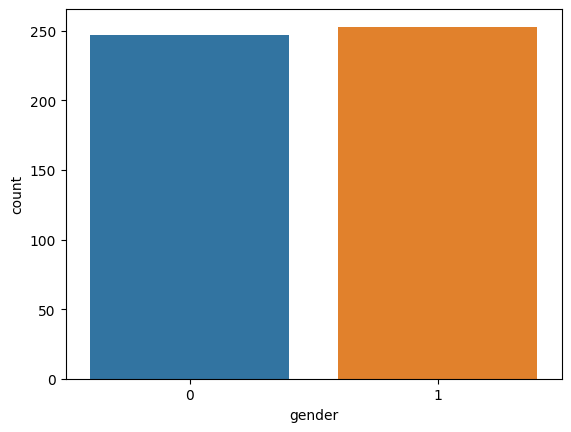

In [263]:
sns.countplot(x='gender',data=df)

**There are more male customers**

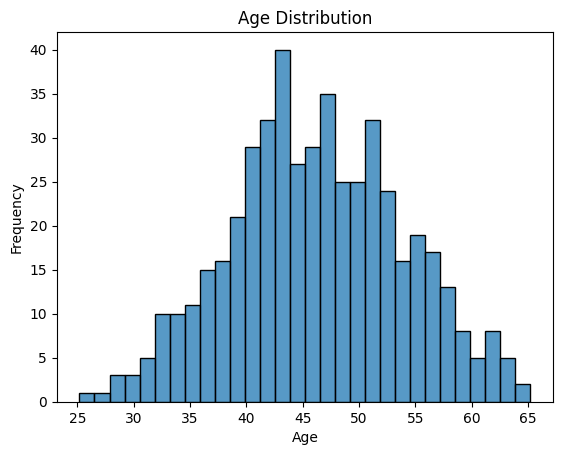

In [289]:
sns.histplot(df['age'], bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

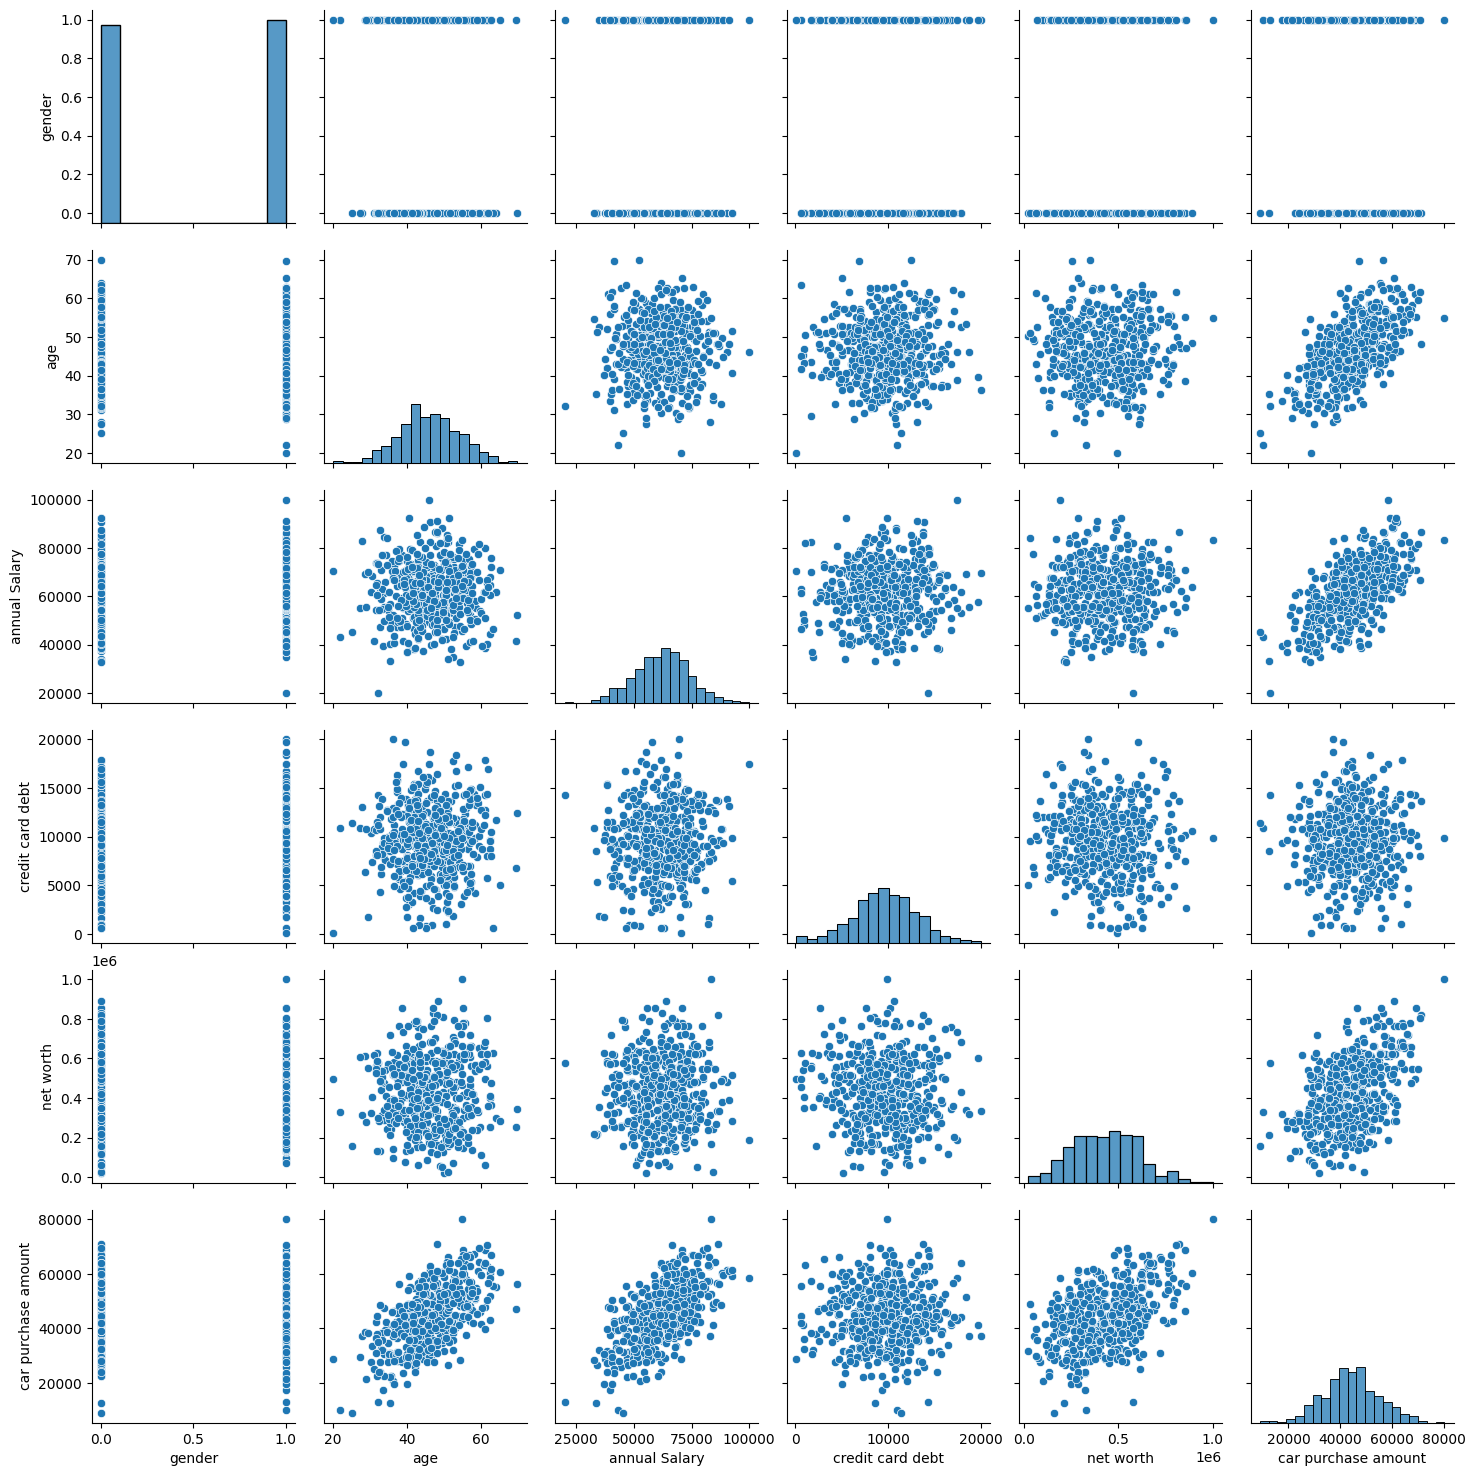

In [264]:
sns.pairplot(df)


In [265]:
c = df.country.value_counts().head(10).sort_values()
c

Greenland           5
Saint Barthélemy    5
Guinea              5
Iraq                5
Samoa               5
Liechtenstein       5
Bhutan              5
Israel              6
Mauritania          6
Bolivia             6
Name: country, dtype: int64

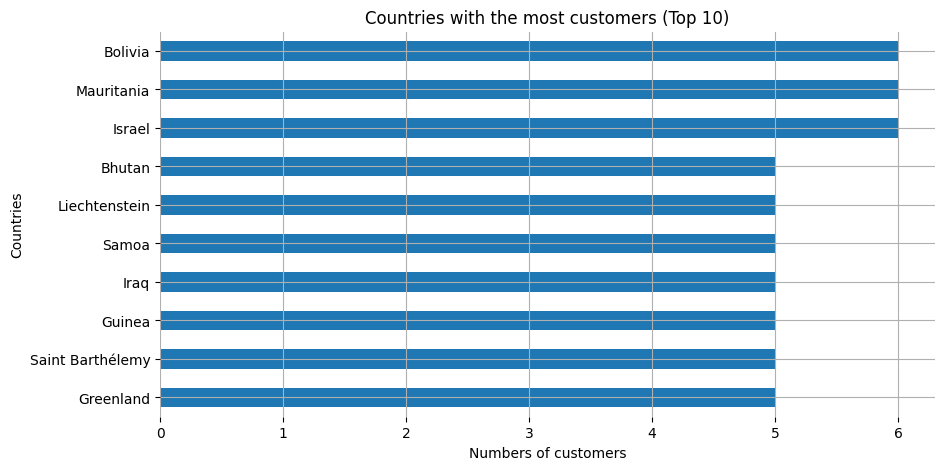

In [266]:
c.plot(kind='barh',
       figsize=(10, 5),
       grid=True)
plt.title("Countries with the most customers (Top 10)")
plt.ylabel("Countries")
plt.xlabel("Numbers of customers")
plt.box(False)
plt.show()

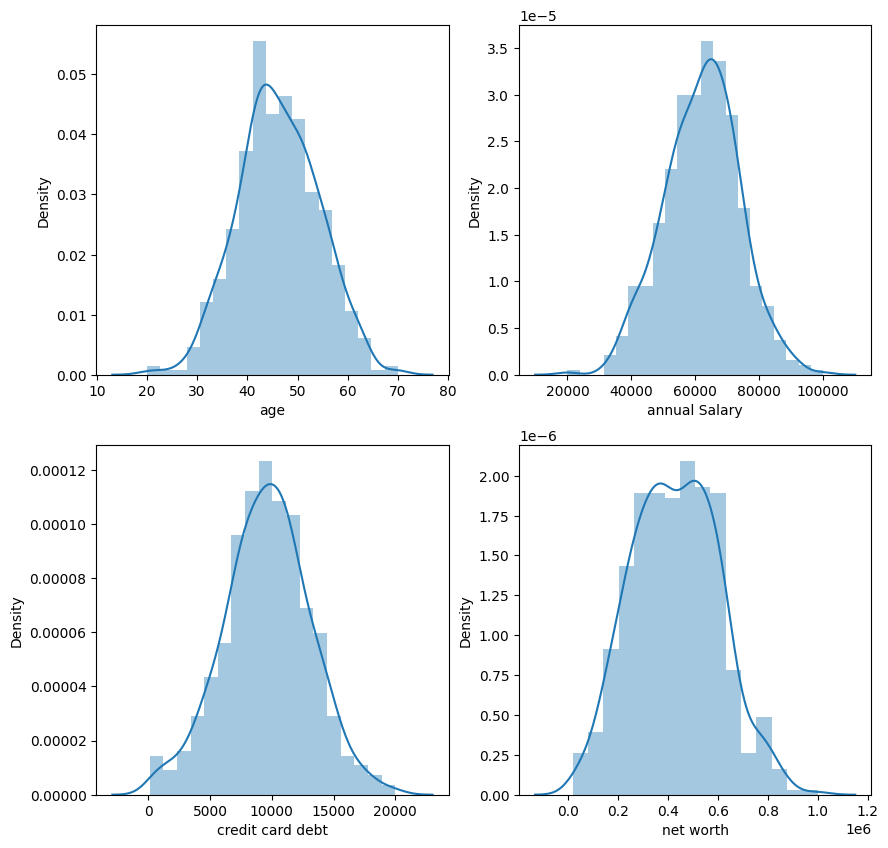

In [267]:
plt.figure(figsize=(10,10))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(df[i[1]])

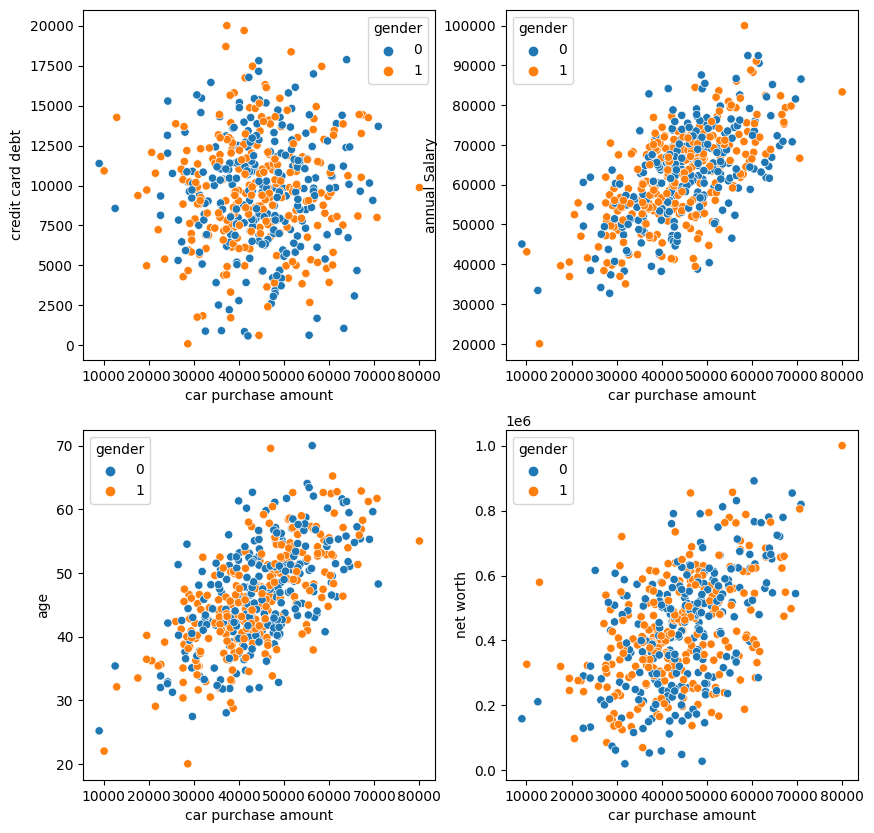

In [268]:


fig,axes = plt.subplots(2,2,figsize=(10,10))
cols =[ 'credit card debt','age', 'annual Salary', 'net worth']
for i in range(4):
    sns.scatterplot(x='car purchase amount', y=cols[i], data=df, ax=axes[i%2,i//2], hue='gender' )



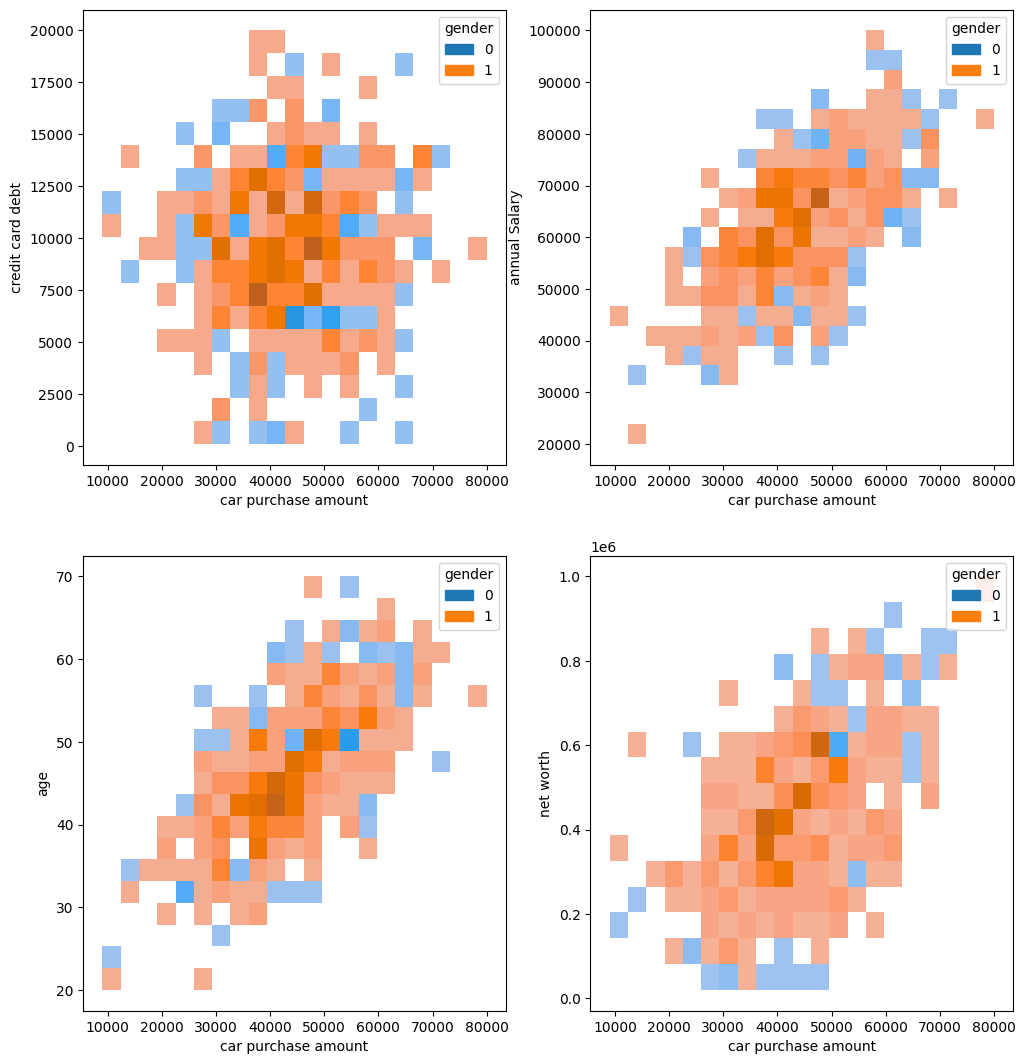

In [269]:
fig,axes = plt.subplots(2,2,figsize=(12,13))
cols =[ 'credit card debt','age', 'annual Salary', 'net worth']
for i in range(4):
    sns.histplot(kde= True, x='car purchase amount', y=cols[i], data=df, ax=axes[i%2,i//2], hue='gender' )

<Axes: >

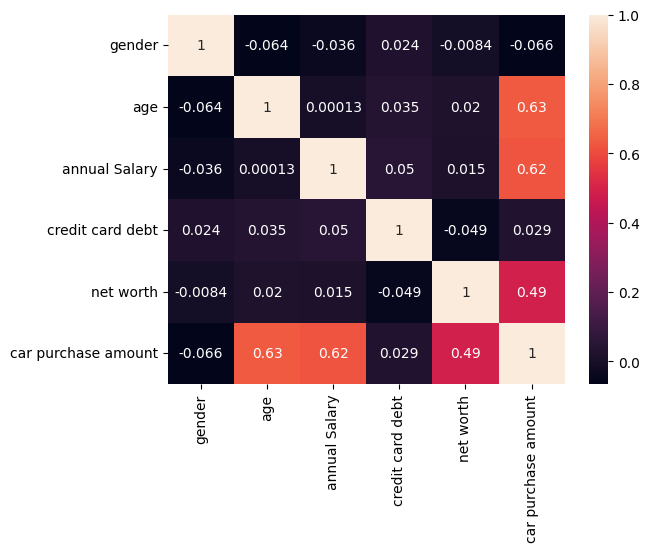

In [270]:
sns.heatmap(df.corr(), annot= True)



*   **High Correlation between car purchase amount and Salary.**
*   **Not so High correlation between Gender ,Credit card Debt and Car
      Purchase Amount.**



In [271]:
df=df.drop(['gender','country'],axis=1)

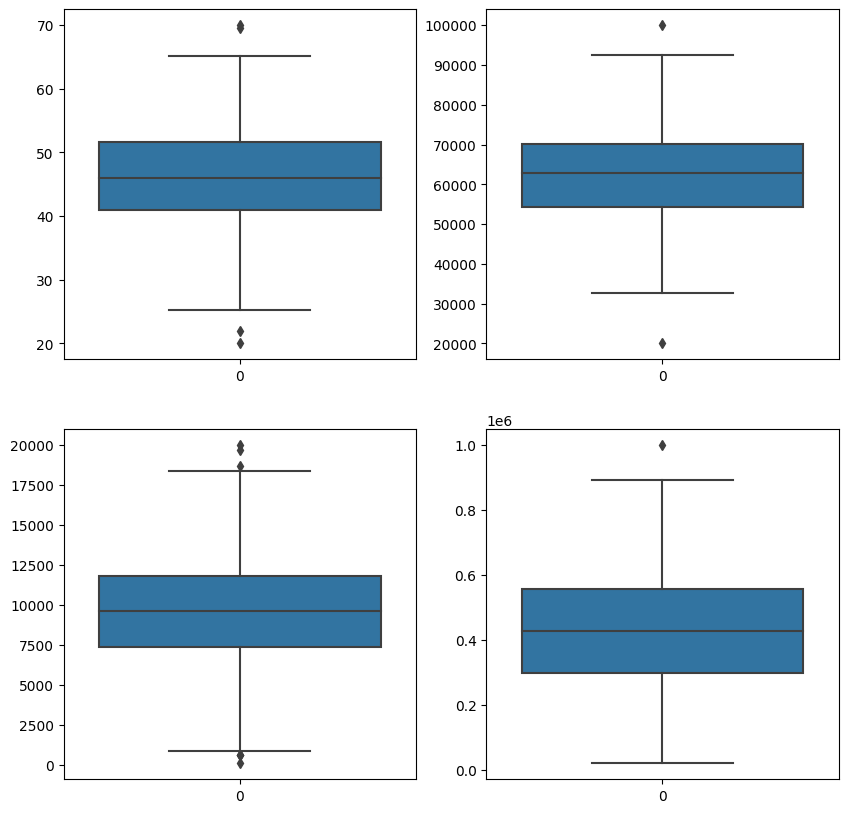

In [272]:
plt.figure(figsize=(10,10))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(df[i[1]])

In [273]:
def remove_outlier(df,col_name):
    Q1=df[col_name].quantile(0.25)
    Q3=df[col_name].quantile(0.75)
    IQR=Q3-Q1
    df_out=df.loc[(df[col_name]>Q1-1.5*IQR)&(df[col_name]<Q3+1.5*IQR)]
    return df_out
df=remove_outlier(df,'age')
df=remove_outlier(df,'credit card debt')
df=remove_outlier(df,'net worth')
df=remove_outlier(df,'annual Salary')

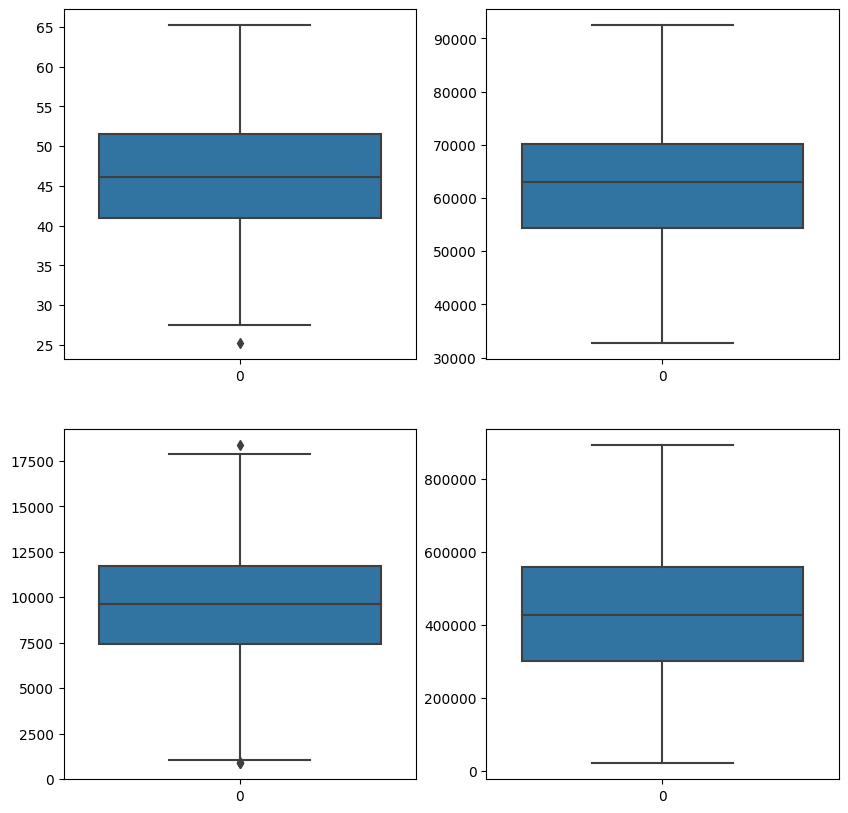

In [274]:


plt.figure(figsize=(10,10))
for i in enumerate(num_cols):
    plt.subplot(2,2,i[0]+1)
    sns.boxplot(df[i[1]])



 **Splitting Data**

In [275]:
x= df[['age', 'annual Salary', 'credit card debt', 'net worth']]
y= df[['car purchase amount']]

**FEATURE SCALING**

In [276]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y.values.reshape(-1,1))

In [277]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [278]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(389, 4)
(389, 1)
(98, 4)
(98, 1)


**MODEL CREATION**

In [279]:
# Using a MultipleLinearRegressor
from sklearn.linear_model import LinearRegression

# training the model
lm = LinearRegression()
lm.fit(x_train,y_train)

# making a prediction
m1 = lm.predict(x_test)
m1

array([[7.11309996e-01],
       [5.22418309e-01],
       [5.97543928e-01],
       [6.45718703e-01],
       [8.35029402e-01],
       [6.38596503e-01],
       [6.29226987e-01],
       [4.89186596e-01],
       [5.36320729e-01],
       [5.56011331e-01],
       [5.00623388e-01],
       [4.71492493e-01],
       [6.73332971e-01],
       [8.86736071e-01],
       [3.64311673e-01],
       [4.91493065e-01],
       [4.76785598e-01],
       [5.63300822e-01],
       [5.36704943e-01],
       [6.04087884e-01],
       [5.59152071e-01],
       [6.49974607e-01],
       [6.44831505e-01],
       [7.40489500e-01],
       [6.26418289e-01],
       [6.90580670e-01],
       [3.92058541e-01],
       [4.37734386e-01],
       [8.02679839e-01],
       [5.10530892e-01],
       [5.98159555e-01],
       [3.18364555e-01],
       [8.36524878e-01],
       [7.77733354e-01],
       [4.75131288e-01],
       [5.33474553e-01],
       [3.57908149e-01],
       [3.75053902e-01],
       [7.45431655e-01],
       [7.67599654e-01],


In [280]:
# Using a RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# trainig the model
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

# making a prepdiction
m2 = rf.predict(x_test)
m2

array([0.71848456, 0.55194407, 0.57310609, 0.68860822, 0.83170551,
       0.54823365, 0.62265641, 0.47144291, 0.52184627, 0.55515303,
       0.46747795, 0.52302082, 0.67804316, 0.83306506, 0.33168577,
       0.48615603, 0.4938078 , 0.55347727, 0.52503756, 0.60626074,
       0.53013166, 0.65737294, 0.64154967, 0.73852596, 0.59926674,
       0.69612196, 0.45086592, 0.43952234, 0.77462043, 0.52940109,
       0.61737167, 0.41807261, 0.77324621, 0.74294073, 0.51317022,
       0.5283089 , 0.36021923, 0.42501605, 0.69035709, 0.74989928,
       0.83065676, 0.81401704, 0.75638015, 0.57247793, 0.5241491 ,
       0.60123716, 0.58294831, 0.68991293, 0.64264134, 0.40723069,
       0.52714661, 0.50852788, 0.5824635 , 0.3835351 , 0.50444846,
       0.64274515, 0.45165281, 0.59495503, 0.55801577, 0.58775168,
       0.37452682, 0.43941392, 0.51946277, 0.53590442, 0.64384899,
       0.60985835, 0.66901643, 0.38924384, 0.25735138, 0.63454488,
       0.70697116, 0.62845066, 0.59903247, 0.85876874, 0.83248

In [281]:
# Using a DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# training the model
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

# making a prediction
m3 = dt.predict(x_test)
m3

array([0.71909675, 0.60461389, 0.63647018, 0.70566527, 0.8333647 ,
       0.5240125 , 0.62127994, 0.46935359, 0.55761027, 0.54816505,
       0.46677501, 0.53906929, 0.69880283, 0.88461373, 0.30755872,
       0.43175577, 0.48617923, 0.47956492, 0.52231678, 0.54538572,
       0.53850166, 0.71920172, 0.6518621 , 0.81585814, 0.65561722,
       0.68525828, 0.32324834, 0.40627552, 0.83050228, 0.53850166,
       0.61800118, 0.48447802, 0.85218432, 0.73703043, 0.56117397,
       0.52143532, 0.60438561, 0.41440382, 0.85218432, 0.76892717,
       0.81673876, 0.8333647 , 0.74060739, 0.63189022, 0.52143532,
       0.63591221, 0.60099966, 0.64213722, 0.65206843, 0.39478142,
       0.49791849, 0.47956492, 0.57495843, 0.33009684, 0.57372005,
       0.63865529, 0.43816322, 0.58449129, 0.53811284, 0.61236763,
       0.41892602, 0.32324834, 0.55983534, 0.51756474, 0.59511279,
       0.57239148, 0.64771167, 0.36906681, 0.17054888, 0.6429582 ,
       0.72478976, 0.68766728, 0.62712224, 0.89765178, 0.75297

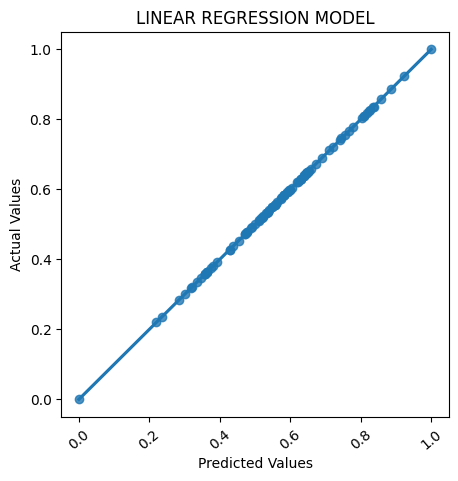

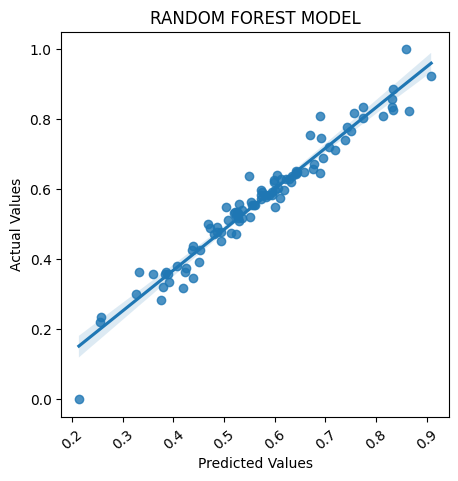

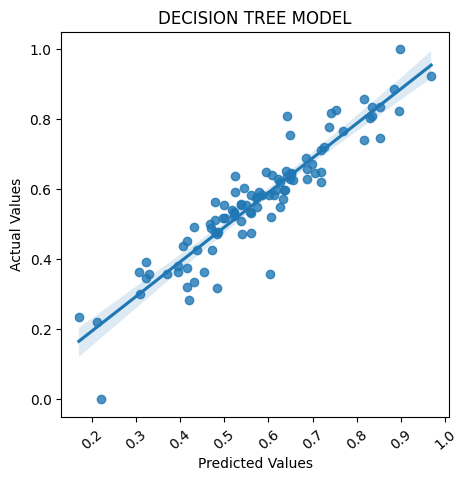

In [282]:
# Visualizing the accuracy of our ML models
model_lst = [m1, m2, m3]
model_names = ["Linear Regression", "Random Forest", "Decision Tree"]
for i in range(len(model_names)):
    ax = plt.subplots(figsize=(5, 5))
    sns.regplot(x=model_lst[i], y=y_test)
    plt.xticks(rotation=40)
    plt.title(model_names[i].upper() + " MODEL")
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")



In [283]:
# Importing modules to help with the calculations for Validation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse


In [284]:
# Importing modules to help with the calculations for Validation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

# mean_absolute_error
for i in range(len(model_names)):
    print(f"Mean absolute error of {model_names[i]} = {mse(y_test, model_lst[i])}")

# r2_score
lm_score = r2_score(y_test, m1)
rf_score = r2_score(y_test, m2)
dt_score = r2_score(y_test, m3)

# Checking for the accuracy of our models to know which is best used on our testing data.
accuracy = {
    "Multiple Linear Regression": lm_score,
    "Random Forest Regressor": rf_score,
    "Decision Tree Regressor": dt_score,

}
# accuracy
print(f"\nThe {max(accuracy, key=accuracy.get)} model has the highest accuracy with value {max(accuracy.values()) * 100}%")



Mean absolute error of Linear Regression = 6.417947033385226e-10
Mean absolute error of Random Forest = 0.0019153850552916104
Mean absolute error of Decision Tree = 0.004048763539462339

The Multiple Linear Regression model has the highest accuracy with value 99.99999774842098%


In [285]:
print(f"Based on the above it is safe to say the {max(accuracy, key=accuracy.get)} model performed the best ")

Based on the above it is safe to say the Multiple Linear Regression model performed the best 


# **CONCLUSION**


**Based on the above it is safe to say the Multiple Linear Regression model performed the best**

**The Multiple Linear Regression model has the highest accuracy with value 99.99999774842098%**